In [18]:
import webrtcvad
import os
import sys
import sox
import shutil
from operator import itemgetter
from itertools import groupby
import numpy as np
import shutil 
import pandas as pd
from scipy import stats
import glob
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ranksums
import os
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import glob
import matplotlib.pyplot as plt
import statsmodels
import statsmodels.api as sm
from scipy.stats import ranksums
import numpy as np
from sklearn import metrics
import sklearn

import numpy as np
from sklearn import metrics
import sklearn


In [19]:
def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=1)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))


def compute_eta_squared(H, n_of_grp,n_of_observ):
    return (H - n_of_grp + 1)/(n_of_observ - n_of_grp)

In [20]:
def compute_auc(array_1, array_2):
    xs = np.concatenate([array_1, array_2],axis=1)
    y = np.concatenate([array_1.shape[1]*[2], array_2.shape[1]*[1]])
    
    for i, x in enumerate(xs):
        fpr, tpr, thresholds = metrics.roc_curve(y, x, pos_label=2)
        #print(i, metrics.auc(fpr, tpr))
        m = metrics.roc_auc_score(y, x)
        print(round(max(m, 1-m), 2))

In [21]:
def delete_multiple_element(list_object, indices):
    indices = sorted(indices, reverse=True)
    for idx in indices:
        if idx < len(list_object):
            list_object.pop(idx)
            
    return list_object


In [22]:
def read_stats_test(file):
    
    with open(file, 'r') as f:
        lista = []
        testo = f.readlines()
        testo = [line.strip("\n") for line in testo]

        for line in testo:
            if line=="":
                pass
            else:
                lista.append(line)
                
    return lista

In [23]:
def holm_correction(kruskal):
    line_to_remove=[]
    values=[]
    corrected =[]
    final = []
    for l in kruskal:
        if "nan" in l:
            line_to_remove.append(kruskal.index(l))
    
    new_krusk = delete_multiple_element(kruskal, line_to_remove)
            
    for line in new_krusk:
        ok = line.split('vs.')[1]
        num = ok.split(" ")[2]
        values.append(float(num))
   # values = [x for x in values if isnan(x) == False]
    result = statsmodels.stats.multitest.fdrcorrection(values, alpha=0.05, method='indep', is_sorted=False)
    num = np.where(result[0] == True)
    list_index = ((num)[0]).tolist()

    for i in list_index:
        corrected.append(result[1][i])
    for i in list_index:
        final.append(kruskal[i])
    
    return final, corrected

In [24]:
df_30msec = pd.read_csv("/export/b15/afavaro/Frontiers/submission/Statistical_Analysis/NLS/Acoustic/Pause/pause_last_meeting.csv")
df_30msec = df_30msec.drop(columns=['Unnamed: 0'])
df_30msec['name'] = [e.split("_ses")[0] for e in df_30msec['AudioFile'].tolist()]
df_30msec['task'] = [e.split("_", -1)[3] for e in df_30msec['AudioFile'].tolist()]
data_ = df_30msec



In [25]:
label_seneca = pd.read_excel("/export/b15/afavaro/Book3.xlsx")
label = label_seneca['Label'].tolist()
speak = label_seneca['Participant I.D.'].tolist() #id
spk2lab_ = {sp:lab for sp,lab in zip(speak,label)}
speak2__ = data_['name'].tolist()
etichettex = []
for nome in speak2__:
    if nome in spk2lab_.keys():
        lav = spk2lab_[nome]
        etichettex.append(([nome, lav]))
    else:
         etichettex.append(([nome, 'Unknown']))
            
label_new_ = []
for e in etichettex:
    label_new_.append(e[1])
data_['label'] = label_new_


label = label_seneca['Age'].tolist()
speak = label_seneca['Participant I.D.'].tolist()
spk2lab_ = {sp:lab for sp,lab in zip(speak,label)}
speak2__ = data_['name'].tolist()
etichettex = []
for nome in speak2__:
    if nome in spk2lab_.keys():
        lav = spk2lab_[nome]
        etichettex.append(([nome, lav]))
    else:
         etichettex.append(([nome, 'Unknown']))
            
label_new_ = []
for e in etichettex:
    label_new_.append(e[1])
data_['age'] = label_new_
data_

,Speech_Time_VADInt_1,Total_Time_VADInt_1,Pause_Time_VADInt_1,Pause_Percentage_VADInt_1,Pause_Speech_Ratio_VADInt_1,Mean_Pause_Length_VADInt_1,Pause_Variability_VADInt_1,Speech_Time_VADInt_2,Total_Time_VADInt_2,Pause_Time_VADInt_2,...,Pause_Time_VADInt_3,Pause_Percentage_VADInt_3,Pause_Speech_Ratio_VADInt_3,Mean_Pause_Length_VADInt_3,Pause_Variability_VADInt_3,AudioFile,name,task,label,age
0,30.18,41.56,11.38,0.273821,0.377071,0.422222,0.221669,28.54,41.56,13.02,...,13.44,0.360709,0.564232,0.634286,0.769139,AD_2_ses1_Joke.wav,AD_2,Joke.wav,CTRL,68
1,34.50,41.12,6.62,0.160992,0.191884,0.255000,0.122246,32.48,39.32,6.84,...,9.44,0.251868,0.336662,0.283333,0.203056,AD_2_ses1_Poem.wav,AD_2,Poem.wav,CTRL,68
2,70.18,76.30,6.12,0.080210,0.087204,0.194118,0.047942,67.76,76.26,8.50,...,18.30,0.240094,0.315953,0.238734,0.096236,AD_2_ses1_RainbowPassage.wav,AD_2,RainbowPassage.wav,CTRL,68
3,49.92,59.96,10.04,0.167445,0.201122,0.372593,0.194612,48.28,57.68,9.40,...,17.22,0.298855,0.426238,0.197778,0.109801,AD_2_ses3_CookieThief.wav,AD_2,CookieThief.wav,CTRL,68
4,31.82,37.34,5.52,0.147831,0.173476,0.328696,0.192098,30.34,36.14,5.80,...,10.60,0.299266,0.427075,0.303333,0.170106,AD_2_ses3_Poem.wav,AD_2,Poem.wav,CTRL,68
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,57.08,59.98,2.90,0.048349,0.050806,0.241667,0.166364,55.90,58.28,2.38,...,11.02,0.190988,0.236075,0.177333,0.091865,PEC_7_ses1_CookieThief.wav,PEC_7,CookieThief.wav,CTRL,64
325,26.80,36.20,9.40,0.259669,0.350746,0.672857,1.257806,26.10,36.20,10.10,...,10.78,0.327262,0.486462,0.426061,0.983066,PEC_7_ses1_Joke.wav,PEC_7,Joke.wav,CTRL,64
326,29.28,32.70,3.42,0.104587,0.116803,0.320000,0.213785,27.78,31.30,3.52,...,5.72,0.197514,0.246127,0.255000,0.247635,PEC_7_ses1_Poem.wav,PEC_7,Poem.wav,CTRL,64
327,56.02,58.70,2.68,0.045656,0.047840,0.229333,0.098553,54.38,57.32,2.94,...,9.66,0.170130,0.205008,0.173803,0.078824,PEC_7_ses1_RainbowPassage.wav,PEC_7,RainbowPassage.wav,CTRL,64


In [26]:
tot = data_.groupby('task')
rp = tot.get_group('RainbowPassage.wav')
ctp = tot.get_group('CookieThief.wav')
jk =  tot.get_group('Joke.wav')
pom = tot.get_group('Poem.wav')

## Rainbow passage (read passage)

In [27]:
grouped = rp.groupby("label") #here we extract the values by category

control = grouped.get_group("CTRL") 

control = control[~control.name.str.contains("PEC_4")]
control = control[~control.name.str.contains("PEC_5")]
control = control[~control.name.str.contains("PEC_9")]
control = control[~control.name.str.contains("PEC_14")]
control = control[~control.name.str.contains("PEC_15")]
control = control[~control.name.str.contains("PEC_16")]
control = control[~control.name.str.contains("PEC_17")]
control = control[~control.name.str.contains("PEC_18")]
control = control[~control.name.str.contains("PEC_19")]
control = control[~control.name.str.contains("PEC_23")]
control = control[~control.name.str.contains("PEC_25")]
control = control[~control.name.str.contains("PEC_29")]
control = control[~control.name.str.contains("PEC_35")]

control = control[~control.name.str.contains("PEC_41")]
control = control[~control.name.str.contains("PEC_55")]
control = control[~control.name.str.contains("PEC_64")]
control = control[~control.name.str.contains("PEC_61")]
control = control[~control.name.str.contains("PEC_67")]
control = control[~control.name.str.contains("PEC_68")]


parkinson_ = grouped.get_group("PD")
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_116")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_35")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_21")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_20")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
#
#
task = rp.columns[:-5].values.tolist()
parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(rp.columns[:-5])])
control_all_feat = np.array([control[feat] for feat in np.array(rp.columns[:-5])])


def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
        

with open('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC/Results/RP_PAUSE_new.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC/Results/RP_PAUSE_new.txt')
holm_correction(kruskal_1)

([], [])

/home/afavaro/new_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


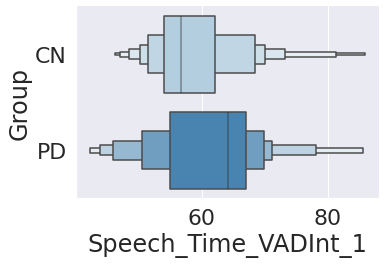

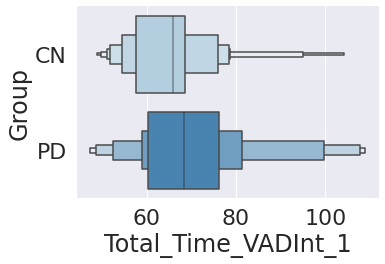

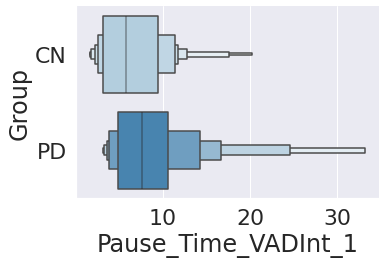

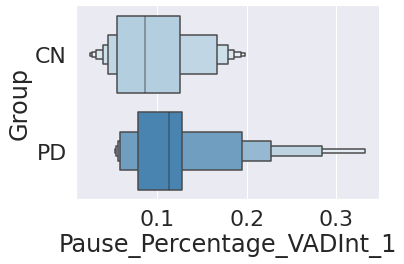

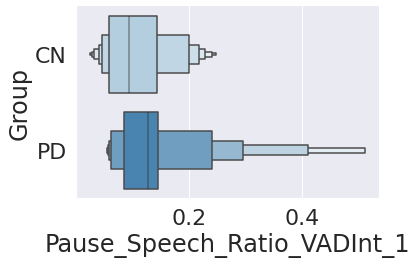

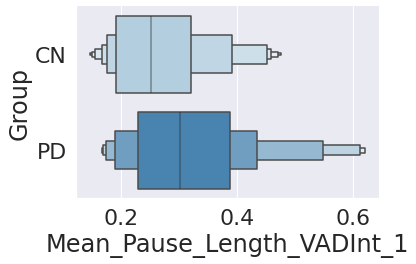

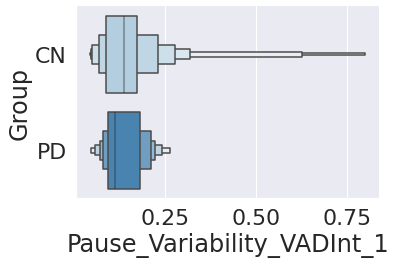

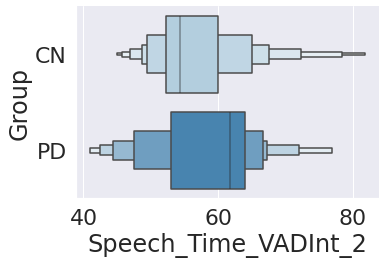

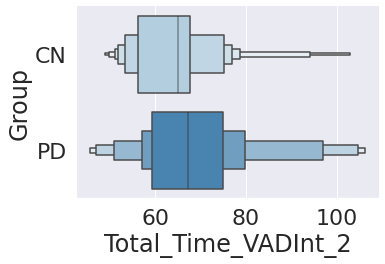

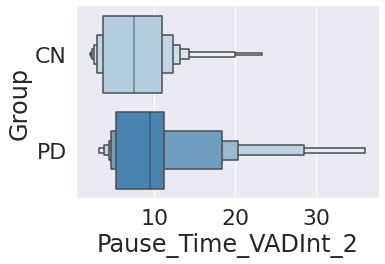

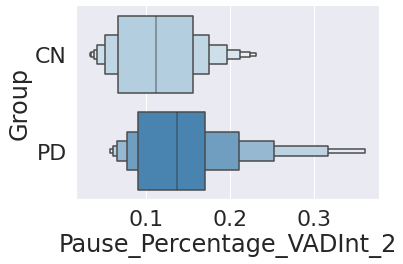

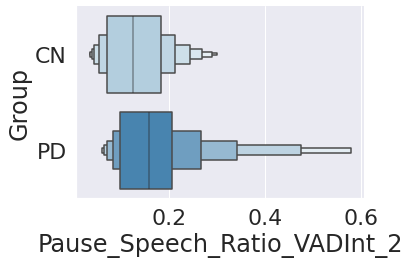

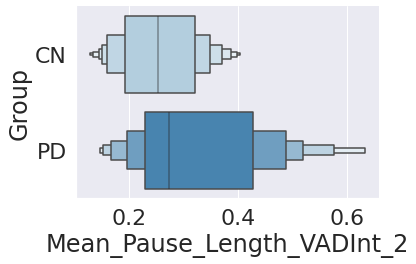

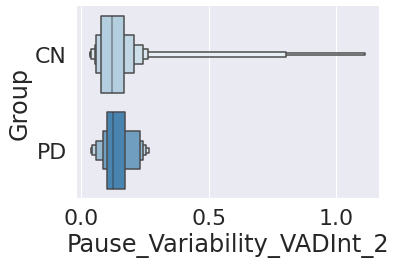

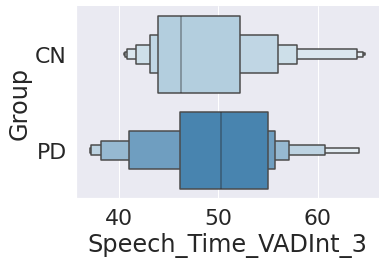

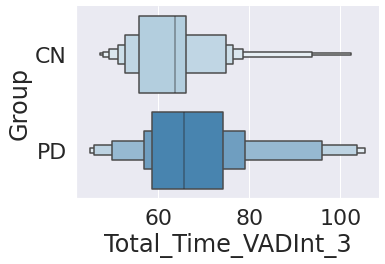

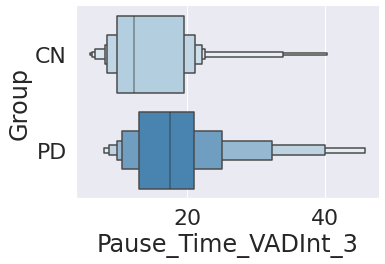

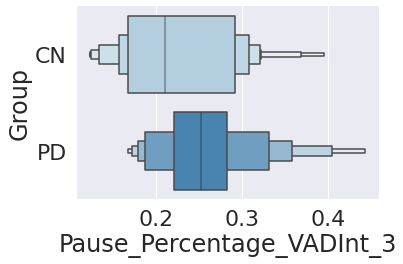

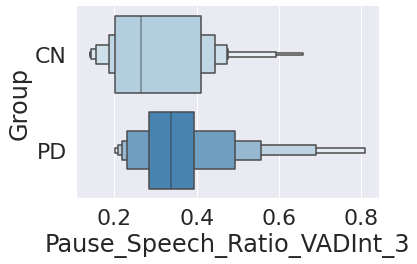

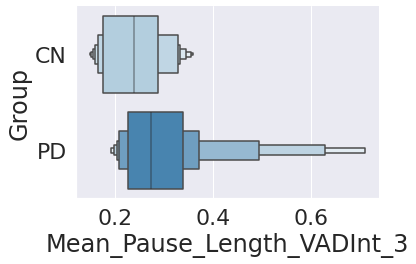

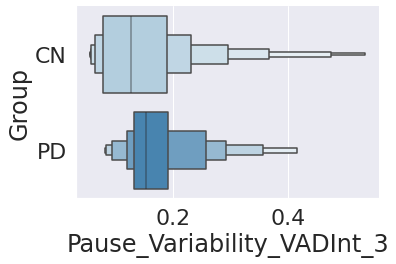

In [28]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
   # plt.savefig(f'/export/b15/afavaro/Frontiers/submission/NLS/Plots/{nome}', facecolor='white', dpi=600)

## Cookie theft picture description (Spontaneous speech)

In [29]:
grouped = ctp.groupby("label") #here we extract the values by category
control = grouped.get_group("CTRL") 
control = control[~control.name.str.contains("PEC_4")]
control = control[~control.name.str.contains("PEC_5")]
control = control[~control.name.str.contains("PEC_9")]
control = control[~control.name.str.contains("PEC_14")]
control = control[~control.name.str.contains("PEC_15")]
control = control[~control.name.str.contains("PEC_16")]
control = control[~control.name.str.contains("PEC_17")]
control = control[~control.name.str.contains("PEC_18")]
control = control[~control.name.str.contains("PEC_19")]
control = control[~control.name.str.contains("PEC_23")]
control = control[~control.name.str.contains("PEC_25")]
control = control[~control.name.str.contains("PEC_29")]
control = control[~control.name.str.contains("PEC_35")]
control = control[~control.name.str.contains("PEC_41")]
control = control[~control.name.str.contains("PEC_55")]
control = control[~control.name.str.contains("PEC_64")]
control = control[~control.name.str.contains("PEC_61")]
control = control[~control.name.str.contains("PEC_67")]
control = control[~control.name.str.contains("PEC_68")]
parkinson_ = grouped.get_group("PD")
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_116")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_35")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_21")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_20")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
#
task = ctp.columns[:-5].values.tolist()


parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(ctp.columns[:-5])])
control_all_feat = np.array([control[feat] for feat in np.array(ctp.columns[:-5])])


def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        
        

with open('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC/Results/ctp_PAUSE_RT.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC/Results/ctp_PAUSE_RT.txt')
holm_correction(kruskal_1)
#kruskal_1


(['kruskal results for Speech_Time_VADInt_1 controls vs. parkinson 0.0034539605198213126 ',
  'kruskal results for Total_Time_VADInt_1 controls vs. parkinson 0.02395233627860012 ',
  'kruskal results for Pause_Time_VADInt_1 controls vs. parkinson 0.022463209360138674 ',
  'kruskal results for Pause_Percentage_VADInt_1 controls vs. parkinson 0.0154795097795049 ',
  'kruskal results for Pause_Speech_Ratio_VADInt_1 controls vs. parkinson 0.0154795097795049 ',
  'kruskal results for Mean_Pause_Length_VADInt_1 controls vs. parkinson 0.0037917859267093484 ',
  'kruskal results for Pause_Variability_VADInt_1 controls vs. parkinson 0.022900500343447573 ',
  'kruskal results for Speech_Time_VADInt_2 controls vs. parkinson 0.0023030995828158384 ',
  'kruskal results for Total_Time_VADInt_2 controls vs. parkinson 0.00031423297705782317 ',
  'kruskal results for Pause_Time_VADInt_2 controls vs. parkinson 0.02714043004491854 ',
  'kruskal results for Pause_Percentage_VADInt_2 controls vs. parkinson

/home/afavaro/new_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


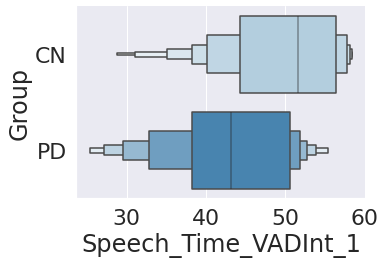

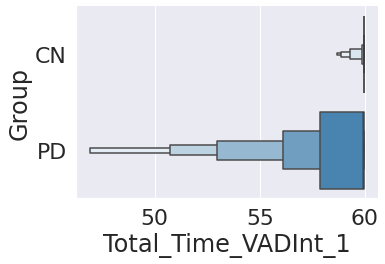

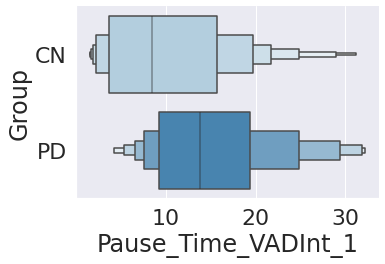

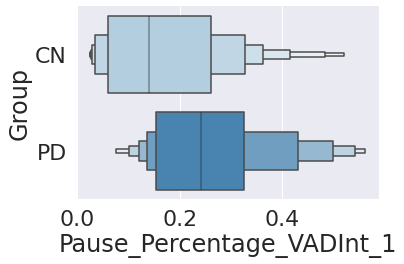

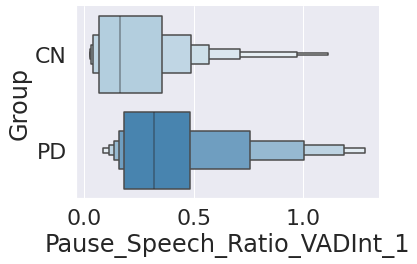

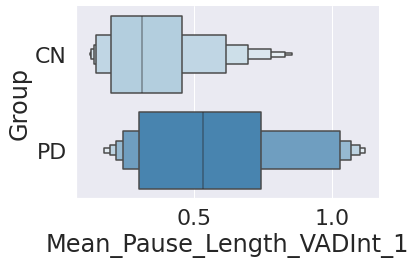

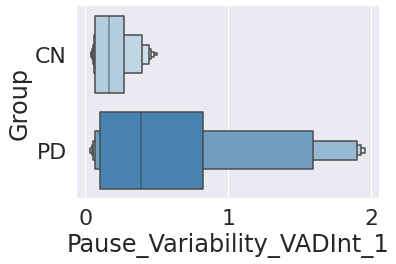

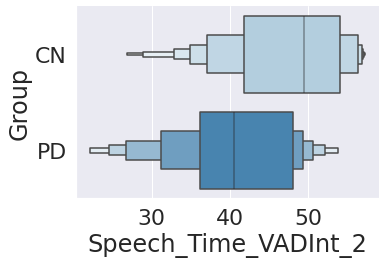

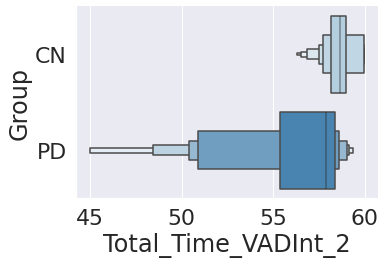

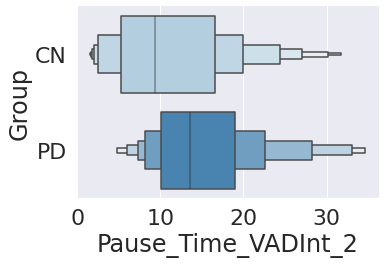

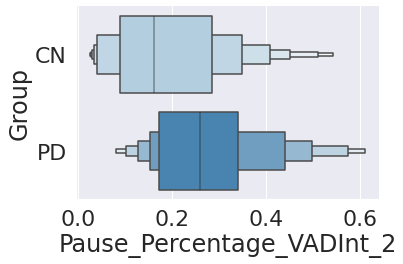

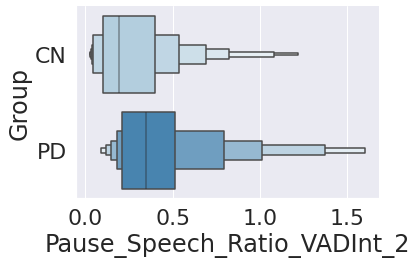

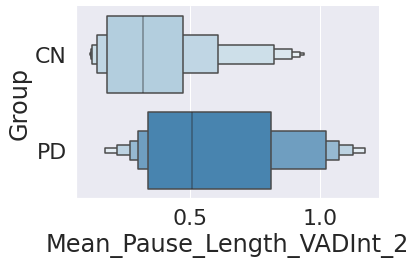

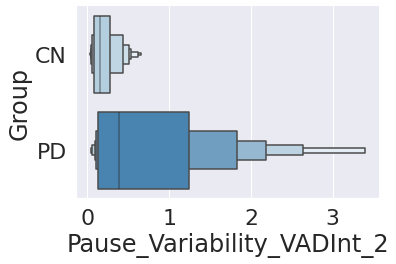

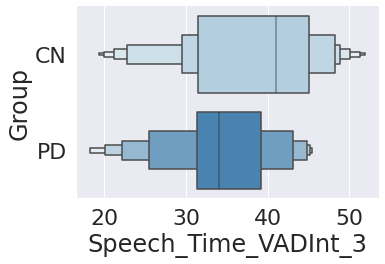

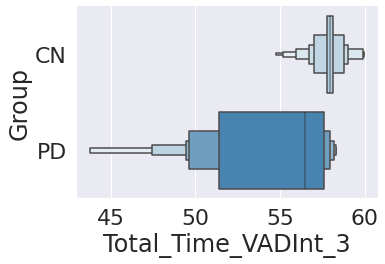

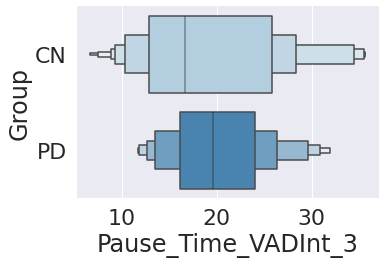

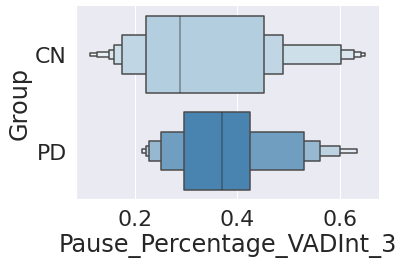

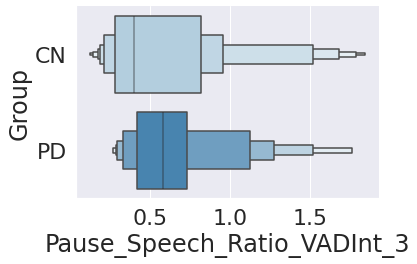

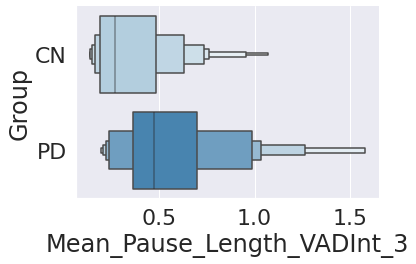

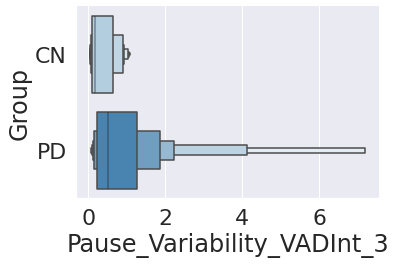

In [30]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
   # plt.savefig(f'/export/b15/afavaro/Frontiers/submission/NLS/Plots/{nome}', facecolor='white', dpi=600)

## Poem (read passage)

In [32]:
grouped = pom.groupby("label") #here we extract the values by category

control = grouped.get_group("CTRL") 
control = control[~control.name.str.contains("PEC_4")]
control = control[~control.name.str.contains("PEC_5")]
control = control[~control.name.str.contains("PEC_9")]
control = control[~control.name.str.contains("PEC_14")]
control = control[~control.name.str.contains("PEC_15")]
control = control[~control.name.str.contains("PEC_16")]
control = control[~control.name.str.contains("PEC_17")]
control = control[~control.name.str.contains("PEC_18")]
control = control[~control.name.str.contains("PEC_19")]
control = control[~control.name.str.contains("PEC_23")]
control = control[~control.name.str.contains("PEC_25")]
control = control[~control.name.str.contains("PEC_29")]
control = control[~control.name.str.contains("PEC_35")]
control = control[~control.name.str.contains("PEC_41")]
control = control[~control.name.str.contains("PEC_55")]
control = control[~control.name.str.contains("PEC_64")]
control = control[~control.name.str.contains("PEC_61")]
control = control[~control.name.str.contains("PEC_67")]
control = control[~control.name.str.contains("PEC_68")]

parkinson_ = grouped.get_group("PD")
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_116")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_34")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_35")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_33")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_21")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_20")]
parkinson_ = parkinson_[~parkinson_.name.str.contains("NLS_12")]
task = pom.columns[:-5].values.tolist()

parkinson_all_feat = np.array([parkinson_[feat] for feat in np.array(pom.columns[:-5])])
control_all_feat = np.array([control[feat] for feat in np.array(pom.columns[:-5])])

def kruskal(f, task, c, p, c_name, p_name):
    for i, title in enumerate(task):
        nome = title
        f.write(('\n'+ f'kruskal results for {title} {c_name} {p_name} {stats.kruskal(c[i], p[i]).pvalue} \n\n'))
        

with open('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC/Results/pom_pa_RT.txt', 'w') as f:
 
    kruskal(f, task, control_all_feat, parkinson_all_feat, "controls vs.", "parkinson")
    

kruskal_1 = read_stats_test('/export/b15/afavaro/Frontiers/submission/NLS/ACOUSTIC/Results/pom_pa_RT.txt')
holm_correction(kruskal_1)
#kruskal_1

(['kruskal results for Mean_Pause_Length_VADInt_3 controls vs. parkinson 0.001234128489565069 '],
 [0.02591669828086645])

/home/afavaro/new_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


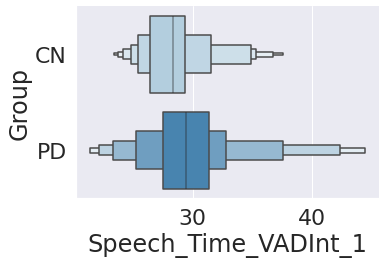

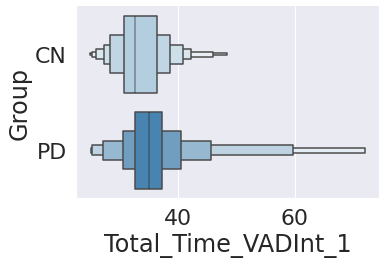

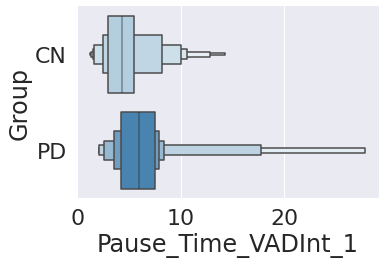

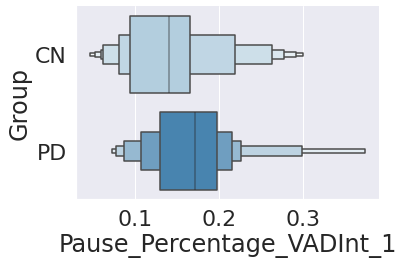

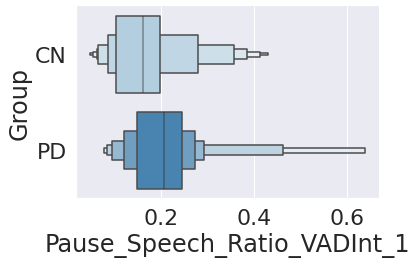

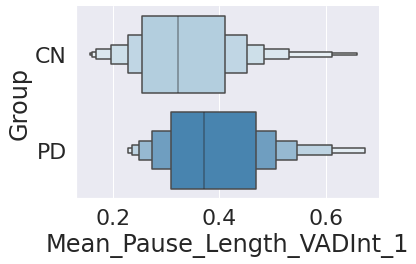

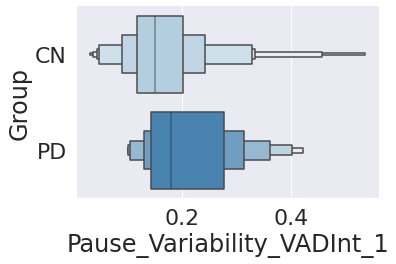

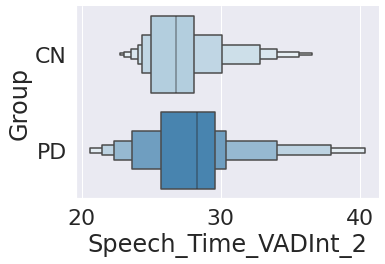

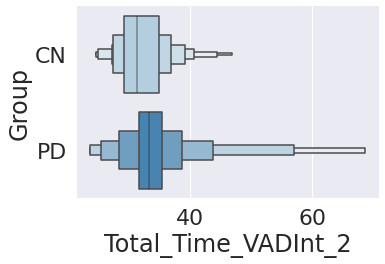

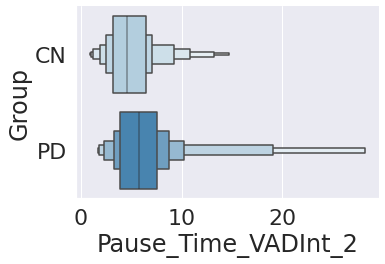

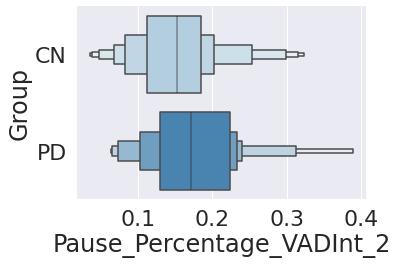

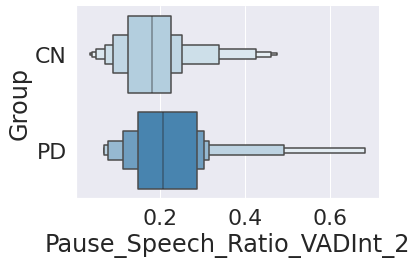

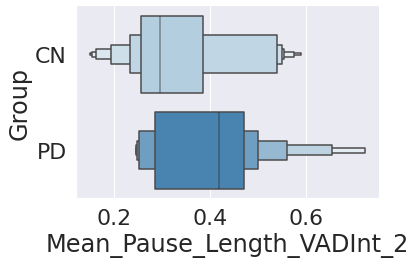

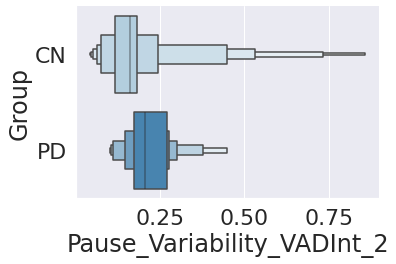

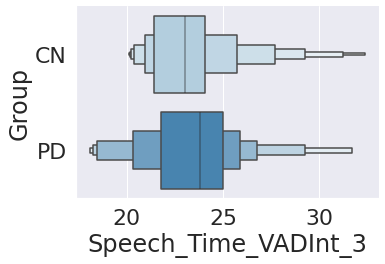

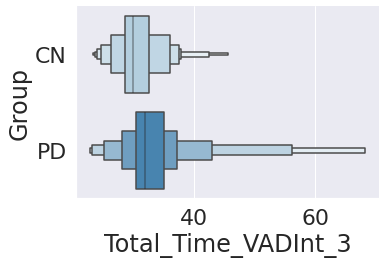

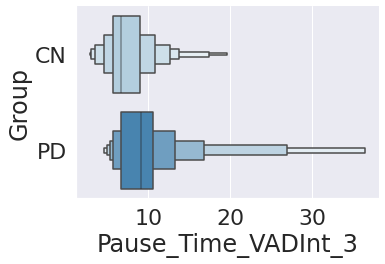

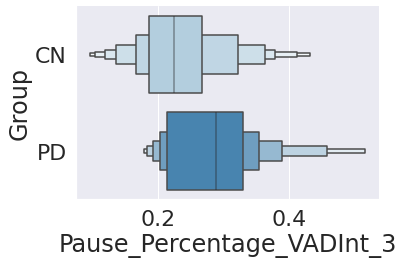

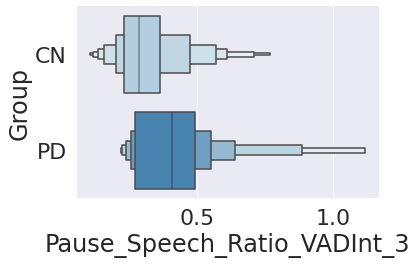

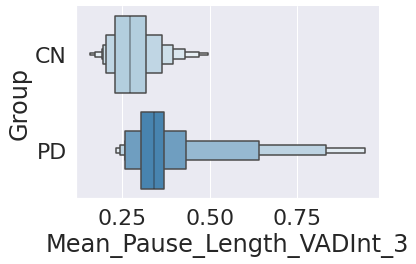

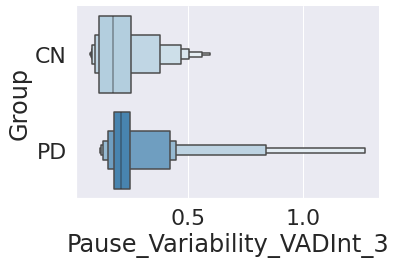

In [33]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
   # plt.savefig(f'/export/b15/afavaro/Frontiers/submission/NLS/Plots/{nome}', facecolor='white', dpi=600)

/home/afavaro/new_conda/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


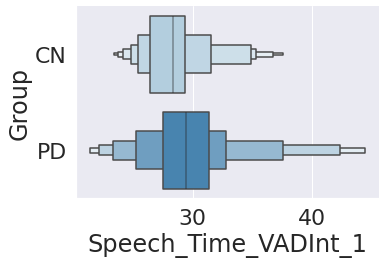

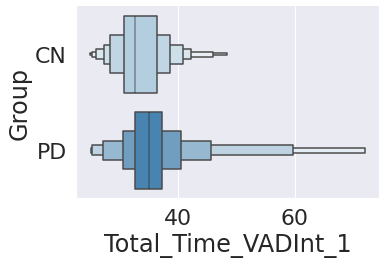

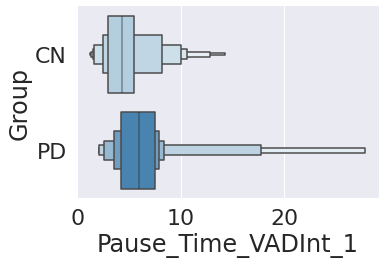

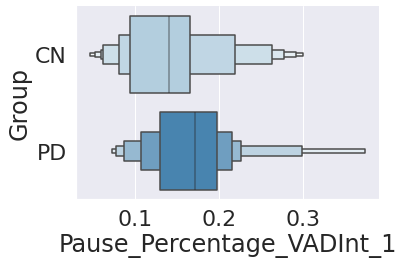

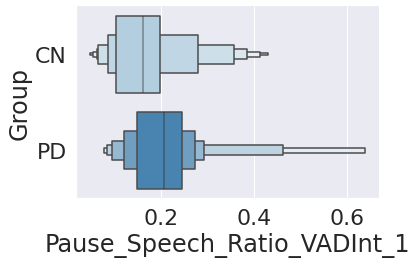

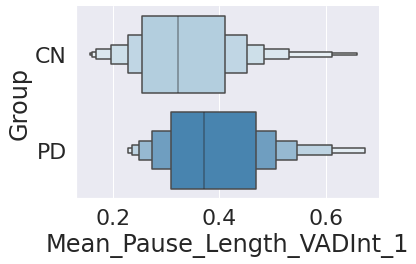

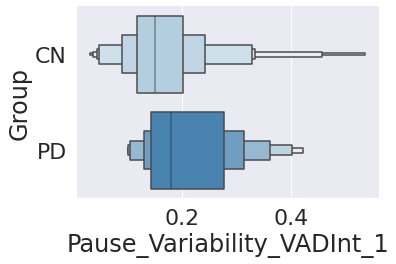

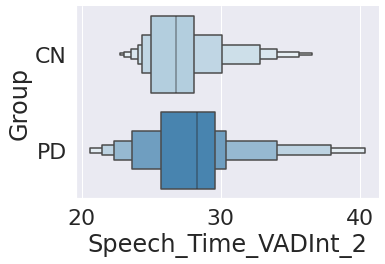

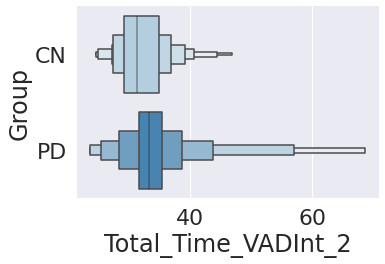

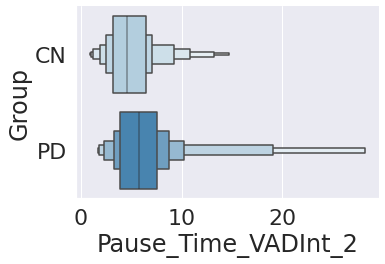

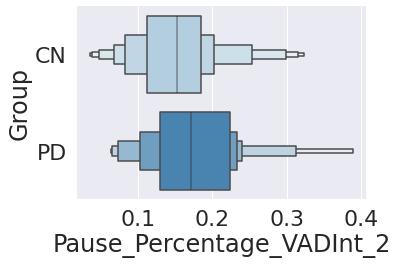

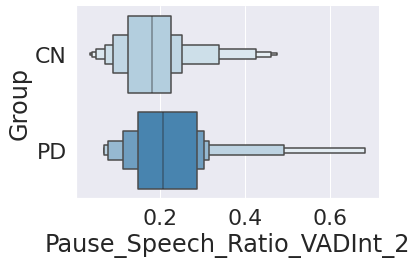

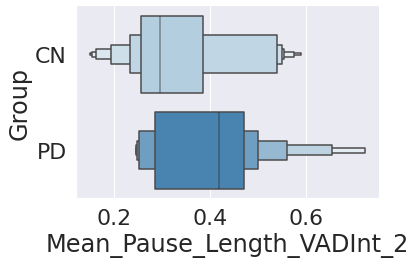

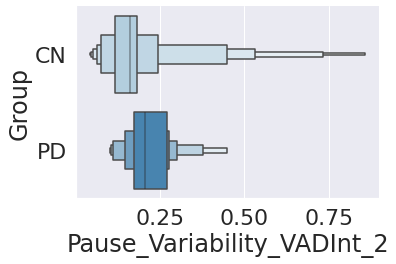

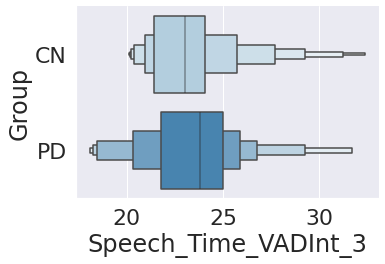

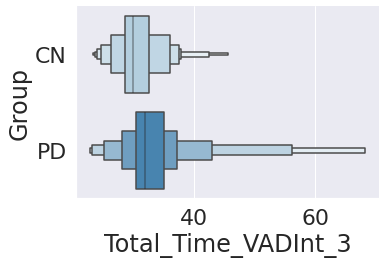

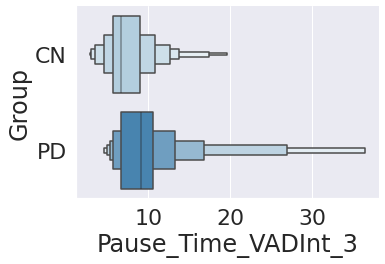

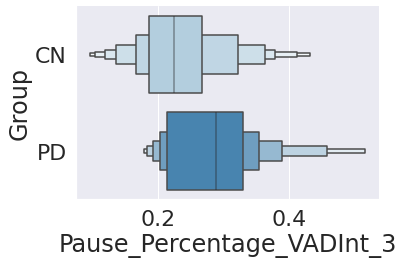

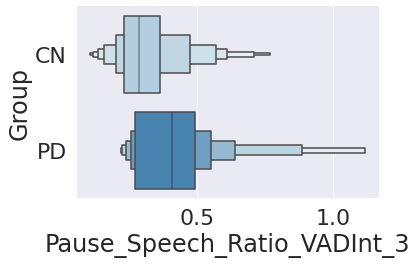

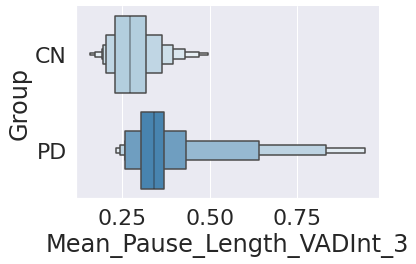

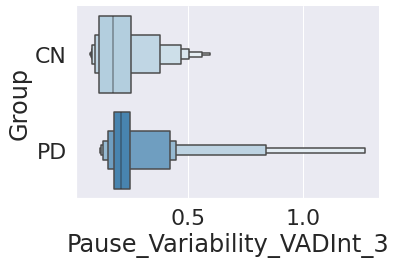

In [34]:
for i, title in enumerate(task):  
    
    nome = title
   
    controls = []
    parkinson=[]
    
    data = np.concatenate([control_all_feat[i], parkinson_all_feat[i]])
    data = data.tolist()
    data = [float(x) for x in data if x != "None"]


    [controls.append('CN') for value in range(len(control_all_feat[i]))]
   
    [parkinson.append('PD') for value in range(len(parkinson_all_feat[i]))]
   
    lista = controls+parkinson
    
    dict = {nome: data, 'Group': lista} 
    df = pd.DataFrame(dict)
    #tips = pd.DataFrame()
    #tips['task'] = data
    #tips['lista'] = lista
    
    sns.set(font_scale=2)
    sns.catplot(x=nome, y="Group", kind="boxen", data=df, k_depth='full', palette="Blues",\
               height=4.2, aspect=1.4, showfliers = False)
    
    #plt.savefig(f'/export/b15/afavaro/Frontiers/submission/NLS/Plots/{nome}', facecolor='white', dpi=600)